In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
X = df.drop('sales',axis=1)
y = df['sales']

## Polynomial regression

In [5]:
from sklearn.preprocessing import PolynomialFeatures

In [6]:
polynomial_converter = PolynomialFeatures(degree=2,
                                         include_bias=False)

### creating new features

In [7]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [10]:
poly_features = polynomial_converter.transform(X)

In [15]:
# have 3 features in the original dataset
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [16]:
# now there are 9 features in the transformed data set
# 3 original + 3 elevated to 2nd degree + 3 interaction terms
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

### linear model 

In [17]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, 
                                                    test_size=0.3, 
                                                    random_state=101)

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
model = LinearRegression()

In [42]:
model.fit(X_train, y_train)

LinearRegression()

In [43]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [44]:
test_prediction = model.predict(X_test)

### error evaluation

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [46]:
MAE = mean_absolute_error(y_test, test_prediction)

In [47]:
MSE = mean_squared_error(y_test, test_prediction)

In [48]:
RMSE = np.sqrt(MSE)

In [49]:
MAE

0.4896798044803811

In [50]:
MSE

0.4417505510403745

In [51]:
RMSE

0.6646431757269268

### bias Variance trade-off

In [61]:
train_rmse_errors = []
test_rmse_errors = []

for d in range (1,6):
    
    # create the different order polynomials
    poly_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = poly_converter.fit_transform(X)
    
    # split poly features train/test
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y,test_size=0.3,random_state=101)
    
    # fit on train
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # predictions on train and test
    train_pred = model.predict(X_train)
    test_pred= model.predict(X_test)
    
    # evaluate the performance
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test,test_pred))
    
    # store/save the rmse for both train and test sets
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

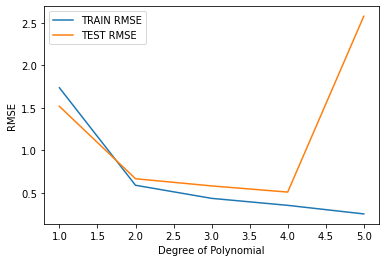

In [62]:
plt.plot(range(1,6),train_rmse_errors[:],label='TRAIN RMSE')
plt.plot(range(1,6),test_rmse_errors[:],label='TEST RMSE')

plt.xlabel('Degree of Polynomial')
plt.ylabel('RMSE')
plt.legend()

It seems a 2nd degree or 3rd degree polynomial is the best we can have in terms of bias variance trade-off

## Model Deployment

In [64]:
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)

In [65]:
final_model = LinearRegression()

In [66]:
full_converted_X = final_poly_converter.fit_transform(X)
final_model.fit(full_converted_X,y)

LinearRegression()

### Saving model and converter

In [67]:
from joblib import dump,load

In [68]:
dump(final_model, 'final_poly_model.joblib')

['final_poly_model.joblib']

In [69]:
dump(final_poly_converter,'final_converter.joblib')

['final_converter.joblib']

### loading model and converter

In [71]:
loaded_converter = load('final_converter.joblib')

In [73]:
loaded_model = load('final_poly_model.joblib')

### deploying model and converter on new data

In [74]:
# new data
campaign = [[149,22,12]]

In [75]:
transformed_data = loaded_converter.fit_transform(campaign)

In [76]:
loaded_model.predict(transformed_data)

array([14.64501014])